In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')  # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

/opt/anaconda3/envs/ml-env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 데이터 로드

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

In [3]:
# 데이터프레임 생성

boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']= target # 타겟변수 추가
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 데이터의 상관관계 확인


In [4]:
# Feature(X)와 Target(y)의 상관관계를 분석
#   상관 관계 지수가 높은 Feature는 Target을 예측 하는데 중요한 Feature가 될 것이다.

boston_df.corr()['PRICE'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

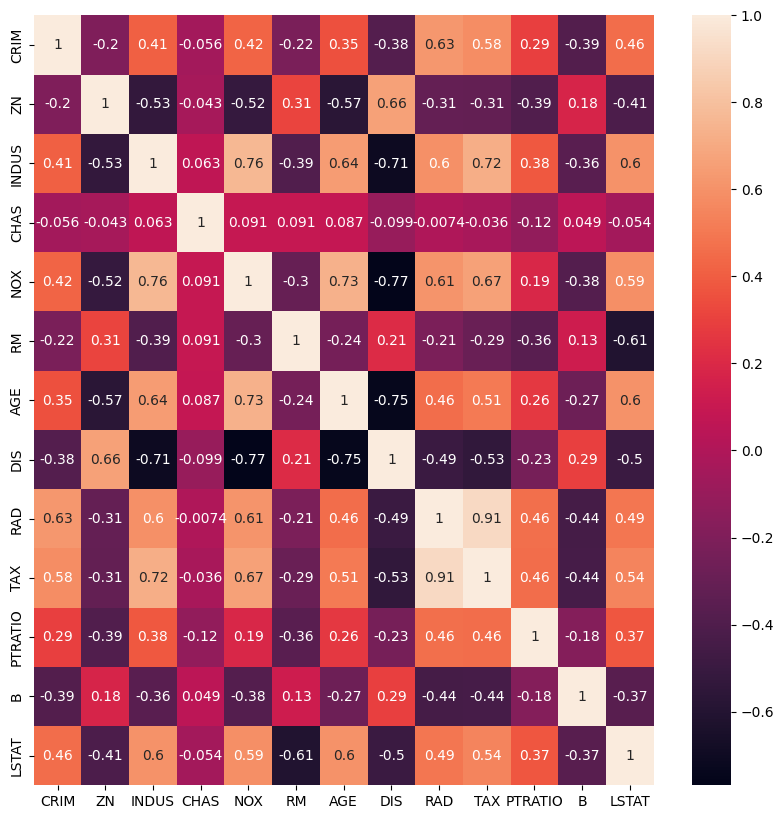

In [5]:
# Feature 끼리의 상관관계 확인 - 너무 강한 상관성을 가진 데이터 확인. ( 다중공선성 확인 )

plt.figure(figsize=(10, 10))

corr_df = boston_df.drop('PRICE', axis=1).corr()
sns.heatmap(
    data=corr_df,
    annot=True
)

plt.show()

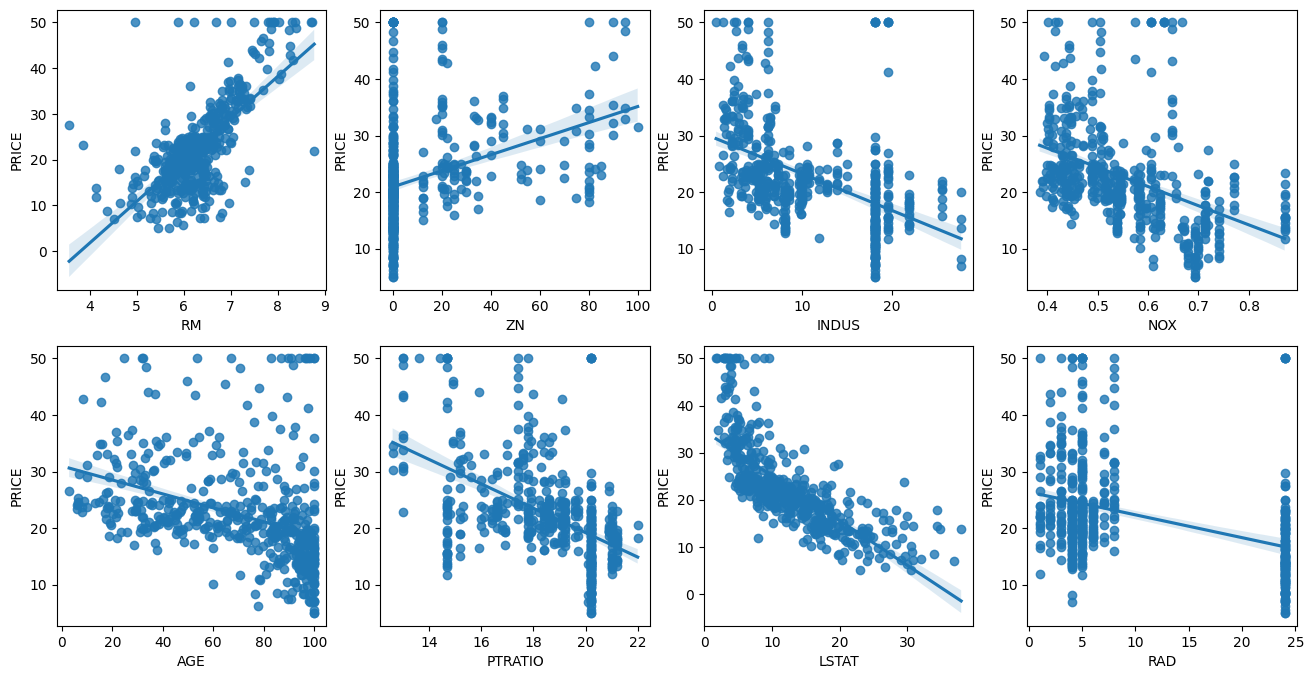

In [6]:
# 2개의 행과 4개의 열을 가진 subplots을 이용. axs는 4X2의 ax를 가짐

fig, axes = plt.subplots(figsize=(16,8), ncols=4, nrows=2)


lm_feature = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_feature):
  row = int(i/4)
  col = i % 4
  # 시본의 regplit을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axes[row, col])

# 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop('PRICE', axis=1),
    boston_df['PRICE'],
    test_size=0.2,
    random_state=42
)


# 모델 훈련 (선형 회귀 모델 학습: 단항 회귀)

In [8]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

# 예측

In [9]:
y_pred = lr_reg.predict(X_test)
y_pred[:3]

array([28.99672362, 36.02556534, 14.81694405])

# 평가

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 24.291
RMSE : 4.929
R2 : 0.669


In [11]:
# RMSE의 값이 전체 데이터의 표준편차보다 작으면 괜찮은 값
boston_df.describe()['PRICE']

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [12]:
# StandardScaling 후 확인하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
boston_scaled = scaler.fit_transform(X_train)

In [13]:
boston_scaled[:3]

array([[ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
        -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
         0.84534281, -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, -0.27808871, -0.15723342,
        -0.68008655, -0.43119908,  0.32434893, -0.62435988, -0.58464788,
         1.20474139,  0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, -0.27808871, -1.00872286,
        -0.40206304, -1.6185989 ,  1.3306972 , -0.97404758, -0.60272378,
        -0.63717631,  0.06529747, -0.65159505]])

In [14]:
# lr_reg_scaled = LinearRegression().fit(boston_scaled, y_train)

# scaled_test = StandardScaler().fit_transform(X_test)

# y_scaled_pred = lr_reg_scaled.predict(scaled_test)

# 위 코드는 절대 사용하면 안됨.
# 절대로 테스트 데이터에 대한 Transformer를 생성하면 안된다!
# 원래 데이터의 분포가 다 깨져버린다.

# ⭐⭐⭐⭐⭐절대로 테스트 데이터에 대한 Transformer를 생성하지 않는다.⭐⭐⭐⭐⭐

# 아래 코드처럼 진행해야 한다


In [15]:
lr_reg_scaled = LinearRegression().fit(boston_scaled, y_train)

scaled_test = scaler.transform(X_test)
y_scaled_pred = lr_reg_scaled.predict(scaled_test)

In [16]:
mse = mean_squared_error(y_test, y_scaled_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_scaled_pred)

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 24.291
RMSE : 4.929
R2 : 0.669


# 다항회귀

In [17]:
from sklearn.preprocessing import PolynomialFeatures

sample = np.arange(6).reshape(3, 2)
sample

# x1 | x2 | x1^2 | x2^2 | x1x2
# ---|----|------|------|-----
#  0 |  1 |    0 |    1 |    0
#  2 |  3 |    4 |    9 |    6
#  4 |  5 |   16 |   25 |   20


array([[0, 1],
       [2, 3],
       [4, 5]])

In [18]:
poly = PolynomialFeatures(degree=2) # degree 파라미터를 이용해서 n 차항 추가

sample_ftr = poly.fit_transform(sample)
sample_ftr


# bias: 결과마다 앞에 붙어 있는 1

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [19]:
boston_poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = boston_poly.fit_transform(X_train)
X_train_poly.shape

(404, 104)

In [20]:
lr_reg_poly = LinearRegression().fit(X_train_poly, y_train)

In [21]:
X_test_poly = boston_poly.transform(X_test)
X_test_poly.shape

(102, 104)

In [22]:
y_test_pred = lr_reg_poly.predict(X_test_poly)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2  = r2_score(y_test, y_test_pred)

print("Test MSE : {:.3f}".format(test_mse))
print("Test RMSE : {:.3f}".format(test_rmse))
print("Test R2 : {:.3f}".format(test_r2))

Test MSE : 14.257
Test RMSE : 3.776
Test R2 : 0.806
